In [22]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [23]:
#for X1
n1 = 100

sample1 = stats.uniform(loc=5, scale=10).rvs(n1)

mean1 = np.mean(sample1)
var1 = np.var(sample1, ddof = 1)
std1 = np.std(sample1)

print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n1 = %.3f" % (mean1, var1, std1, n1))

X1: mean1 = 9.967; var1 = 8.699; std1 = 2.935; n1 = 100.000


In [24]:
#for X2
n2 = 100

sample2 = stats.norm(loc=10, scale=5).rvs(n2)

mean2 = np.mean(sample2)
var2 = np.var(sample2, ddof = 1)
std2 = np.std(sample2)

print("X2: mean2 = %.3f; var2 = %.3f; std2 = %.3f; n2 = %.3f" % (mean2, var2, std2, n2))

X2: mean2 = 9.812; var2 = 19.188; std2 = 4.358; n2 = 100.000


In [25]:
#for X3
n3 = 100

sample3 = stats.norm(loc=10, scale=2).rvs(n3)

mean3 = np.mean(sample3)
var3 = np.var(sample3, ddof = 1)
std3 = np.std(sample3)

print("X3: mean3 = %.3f; var3 = %.3f; std3 = %.3f; n3 = %.3f" % (mean3, var3, std3, n3))

X3: mean3 = 9.650; var3 = 3.975; std3 = 1.984; n3 = 100.000


In [26]:
#for X4
n4 = 100

sample4 = stats.norm(loc=10, scale=5).rvs(n4)

mean4 = np.mean(sample4)
var4 = np.var(sample4, ddof = 1)
std4 = np.std(sample4)

print("X4: mean4 = %.3f; var4 = %.3f; std4 = %.3f; n4 = %.3f" % (mean4, var4, std4, n4))

X4: mean4 = 10.031; var4 = 23.111; std4 = 4.783; n4 = 100.000


In [27]:
#Pooled for X1, X2, X3, X4

mean_pol = (n1 * mean1 + n2 * mean2 + n3 * mean3 + n4 * mean4)/(n1 + n2 + n3 + n4)
var_pol = ((n1 - 1) * var1 + (n2 - 1) * var2 + (n3 - 1) * var3 + (n4 - 1) * var4) / (n1 + n2 + n3 + n4 - 4) #вопрос
std_pol = var_pol**1/2
n_pol = n1 + n2 + n3 + n4
print("Pooled for X1, X2, X3, X4: mean_pol = %.3f; var_pol = %.3f; std_pol = %.3f; n_pol = %.3f" % (mean_pol, var_pol, std_pol, n_pol))

Pooled for X1, X2, X3, X4: mean_pol = 9.865; var_pol = 13.743; std_pol = 6.872; n_pol = 400.000


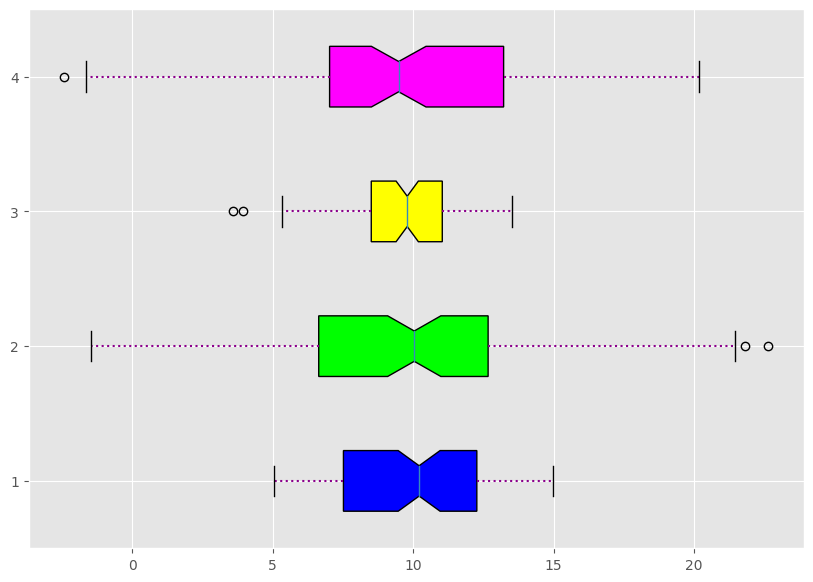

In [28]:
data = [sample1, sample2, sample3, sample4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

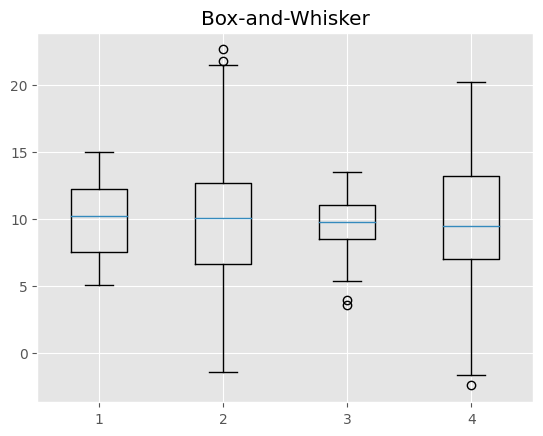

In [29]:
plt.boxplot(data)

# Adding title
plt.title("Box-and-Whisker")

# x-axis labels
ax.set_yticklabels(['data_1', 'data_2',
                    'data_3', 'data_4'])

plt.show()

In [30]:
#критерий Бартлетта
stats.bartlett(sample1, sample2, sample3, sample4)

BartlettResult(statistic=83.2366134269305, pvalue=6.20330267250418e-18)

In [31]:
#Однофакторный дисперсионный анализ
stats.f_oneway(sample1, sample2, sample3, sample4)

F_onewayResult(statistic=0.2106407620553046, pvalue=0.8890195019057309)

In [32]:
K = 4
n = n1 + n2 + n3 + n4
mean = (sum(sample1) + sum(sample2) + sum(sample3) + sum(sample4))/n #общее среднее

#общая дисперсия
s = 0
for ar in data:
  for x in ar:
    s += (x - mean)**2
D_x = s/n

#внутригрупповая дисперсиея
s = 0
for ar in data:
  s = s + len(ar) * np.var(ar)
D_w = s/n

#межгрупповая дисперсия
s = 0
for ar in data:
  s = s + len(ar) * (np.mean(ar) - mean)**2
D_b = s/n

#print(D_x)
#print(D_w + D_b)

print("D_b = %.3f" % D_b)
print("D_w = %.3f" % D_w)
print("D_x = %.3f" % D_x)

print('Несмещенная оценка групировочного признака: {z:.3f}'.format(z = (D_b * n)/(K - 1)))
print('Несмещенная оценка остаточного признака: {z:.3f}'.format(z = (D_w * n)/(n - K)))
print('Несмещенная оценка всех признаков: {z:.3f}'.format(z = (D_x * n)/(n - 1)))

D_b = 0.022
D_w = 13.606
D_x = 13.628
Несмещенная оценка групировочного признака: 2.895
Несмещенная оценка остаточного признака: 13.743
Несмещенная оценка всех признаков: 13.662


In [33]:
eta_squared = D_b / D_x   #эмпирический коэффициент детерминации
eta = eta_squared ** (1/2)   #эмпирическое корреляционное отношение

print("эмпирический коэффициент детерминации: %.3f" % eta_squared)
print("эмпирическое корреляционное отношение: %.3f" % eta)

эмпирический коэффициент детерминации: 0.002
эмпирическое корреляционное отношение: 0.040


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
f_oneway(sample1, sample2, sample3)

df = pd.DataFrame({'score': np.concatenate((sample1, sample2, sample3, sample4)),
                   'group': np.concatenate((np.repeat(['data_1', 'data_2', 'data_3'], repeats=100), np.repeat(['data_4'], repeats=100)))})

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
data_1 data_2  -0.1545 0.9911 -1.5071 1.1981  False
data_1 data_3  -0.3165 0.9308 -1.6692 1.0361  False
data_1 data_4   0.0643 0.9993 -1.2883 1.4169  False
data_2 data_3  -0.1621 0.9897 -1.5147 1.1906  False
data_2 data_4   0.2188 0.9755 -1.1338 1.5714  False
data_3 data_4   0.3809 0.8865 -0.9718 1.7335  False
---------------------------------------------------


In [35]:
alpha = 0.05

c12 = mean1 - mean2
c13 = mean1 - mean3
c23 = mean2 - mean3
c14 = mean1 - mean4
c24 = mean2 - mean4
c34 = mean3 - mean4

var12 = (n * D_w) * (1/n1 + 1/n2) / (n - K)
var13 = (n * D_w) * (1/n1 + 1/n3) / (n - K)
var23 = (n * D_w) * (1/n2 + 1/n3) / (n - K)
var14 = (n * D_w) * (1/n1 + 1/n4) / (n - K)
var24 = (n * D_w) * (1/n2 + 1/n4) / (n - K)
var34 = (n * D_w) * (1/n3 + 1/n4) / (n - K)

quantile_f = stats.f(K-1,n-K).ppf(1 - alpha)

c12_lower = c12 - (var12 * (K-1) * quantile_f)**(1/2)
c13_lower = c13 - (var13 * (K-1) * quantile_f)**(1/2)
c23_lower = c23 - (var23 * (K-1) * quantile_f)**(1/2)
c14_lower = c14 - (var14 * (K-1) * quantile_f)**(1/2)
c24_lower = c24 - (var24 * (K-1) * quantile_f)**(1/2)
c34_lower = c34 - (var34 * (K-1) * quantile_f)**(1/2)

c12_upper = c12 + (var12 * (K-1) * quantile_f)**(1/2)
c13_upper = c13 + (var13 * (K-1) * quantile_f)**(1/2)
c23_upper = c23 + (var23 * (K-1) * quantile_f)**(1/2)
c14_upper = c14 + (var14 * (K-1) * quantile_f)**(1/2)
c24_upper = c24 + (var24 * (K-1) * quantile_f)**(1/2)
c34_upper = c34 + (var34 * (K-1) * quantile_f)**(1/2)

<ipython-input-36-807ed4d3a7ab>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


([<matplotlib.axis.YTick at 0x7f9d48ad9540>,
 [Text(0, 0, 'C12'),
  Text(0, 1, 'C13'),
  Text(0, 2, 'C23'),
  Text(0, 3, 'C14'),
  Text(0, 4, 'C24'),
  Text(0, 5, 'C34')])

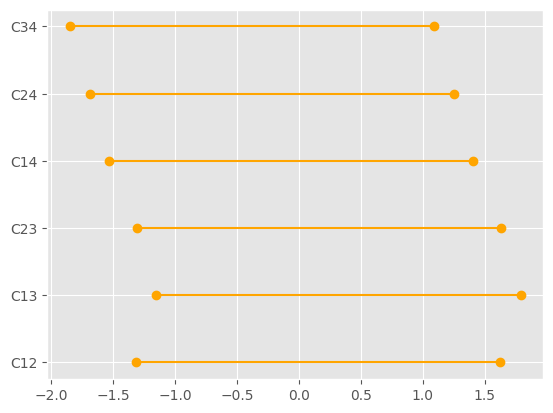

In [36]:
data_dict = {}
data_dict['category'] = ['C12','C13','C23','C14','C24','C34']
data_dict['lower'] = [c12_lower, c13_lower, c23_lower, c14_lower, c24_lower, c34_lower]
data_dict['upper'] = [c12_upper, c13_upper, c23_upper, c14_upper, c24_upper, c34_upper]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))